# Time Series Analysis in Python  
1. Correlation and Autocorrelaction
2. Some Simple Time Series
3. Autoregressive (AR) Models
4. Moving Average (MA) and ARMA models
5. Putting it all together

[link](https://campus.datacamp.com/courses/time-series-analysis-in-python/autoregressive-ar-models?ex=2)

## 1. Correlation and Autocorrelaction

#### Some Useful Pandas Tools  
* Changing an index to datetime
`df.index = pd.to_datetime(df.index)`
* Plotting data, if index has been converted do datetime object we can slice data by year for example  
`df.plot()`  
* Merging two panda df  
`df1.join(df2)`  
* Often we want to change finacial ts data like prices to returns or differences, using two methods.  
`df['col'].pct_change()`  
`df['col'].diff()`  
* pandas correlation method of series is usefull  
`df['XYZ'].corr(df['ABC'])`  

In [1]:
!python --version

Python 3.7.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [3]:
# select file to upload : SP500.csv, BAA10Y.csv, mltiTimeline.csv
uploaded = files.upload()
#uploaded

Saving SP500.csv to SP500.csv
Saving BAA10Y.csv to BAA10Y.csv
Saving multiTimeline.csv to multiTimeline.csv


In [4]:
# check
print(uploaded['multiTimeline.csv'][0:50])
print(uploaded['BAA10Y.csv'][0:50])
print(uploaded['SP500.csv'][0:50])

b'week,diet\r\n2017-01-22,55\r\n2017-01-29,68\r\n2017-02-0'
b'DATE,BAA10Y\n2017-01-20,2.21\n2017-01-23,2.21\n2017-0'
b'DATE,SP500\n2017-01-23,2265.2\n2017-01-24,2280.07\n20'


In [9]:
# load as df
diet = pd.read_csv(io.StringIO(uploaded['multiTimeline.csv'].decode('utf-8')))

# rename week to Date and set as index
diet = diet.rename(columns={'week': 'Date'})
diet.set_index('Date', inplace=True)

# Convert the date index to datetime (to be able to slice it later)
diet.index = pd.to_datetime(diet.index)

print(diet.shape)
diet.head()

(261, 1)


,diet
Date,
2017-01-22,55
2017-01-29,68
2017-02-05,64
2017-02-12,73
2017-02-19,55


The data is on weekly level, one observation is one week of data.

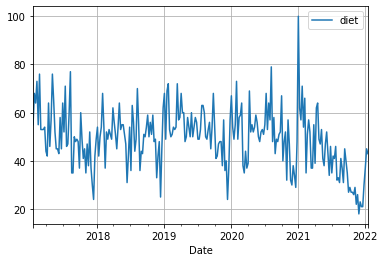

In [6]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

With the index as datetime it looks much nicer on the x-axis with full years.

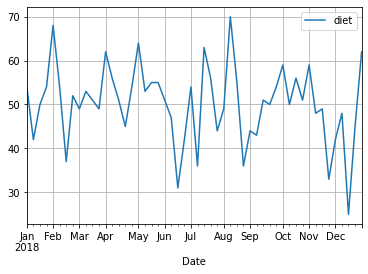

In [7]:
# Slice the dataset to keep only 2018
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2018
diet2018 = diet.loc['2018']

# Plot 2018 data
diet2018.plot(grid=True)
plt.show()

In [8]:
# load bonds data
bonds = pd.read_csv(io.StringIO(uploaded['BAA10Y.csv'].decode('utf-8')), decimal='.')
bonds.set_index('DATE', inplace=True)
bonds.index = pd.to_datetime(bonds.index)
print(bonds.shape)
bonds.head()

(1305, 1)


,BAA10Y
DATE,
2017-01-20,2.21
2017-01-23,2.21
2017-01-24,2.22
2017-01-25,2.21
2017-01-26,2.20


In [10]:
# load stocks data
stocks = pd.read_csv(io.StringIO(uploaded['SP500.csv'].decode('utf-8')))
stocks.set_index('DATE', inplace=True)
stocks.index = pd.to_datetime(bonds.index)
print(stocks.shape)
stocks.head()

(1305, 1)


,SP500
DATE,
2017-01-20,2265.2
2017-01-23,2280.07
2017-01-24,2298.37
2017-01-25,2296.68
2017-01-26,2294.69


The data is on day level, one observation is one day of data.

In [11]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print (stock set minus bonds set)
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how="inner")

stocks_and_bonds.head()

set()


,SP500,BAA10Y
DATE,,
2017-01-20,2265.2,2.21
2017-01-23,2280.07,2.21
2017-01-24,2298.37,2.22
2017-01-25,2296.68,2.21
2017-01-26,2294.69,2.20


In [12]:
#stocks_and_bonds = stocks_and_bonds.apply(pd.to_numeric)

# Convert object (string) to float
stocks_and_bonds['SP500'] = pd.to_numeric(stocks_and_bonds['SP500'], errors='coerce')
stocks_and_bonds['BAA10Y'] = pd.to_numeric(stocks_and_bonds['BAA10Y'], errors='coerce')

print(stocks_and_bonds.info())
stocks_and_bonds.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2017-01-20 to 2022-01-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1260 non-null   float64
 1   BAA10Y  1249 non-null   float64
dtypes: float64(2)
memory usage: 62.9 KB
None


,SP500,BAA10Y
DATE,,
2017-01-20,2265.20,2.21
2017-01-23,2280.07,2.21
2017-01-24,2298.37,2.22
2017-01-25,2296.68,2.21
2017-01-26,2294.69,2.20


**Correlation of Two Time Series**  
Often, stock prices vary together.  
Common mistake: Correlation of Two trending series.  
You can get high correlation of two time series even when they are totally unrelated. Therefore, if you look at the correlation of two stocks *we should look at the correlations of their returns and not their levels*.  
* Correlation of levels can be high  
* Correlation of percent changes can be approximately 0  
  
Correlation of returns.  
* First step, compute the percent change of both series using the pandas `pct_change()` method and then `corr()` method.  
`df['series_1_ret'] = df['series_1'].pct_change()`  
`df['series_2_ret'] = df['series_2'].pct_change()`  
* then `corr()` method.  
`correlation = df['series_1_ret`].corr(df.['series_2_ret'])  
* Visualize the correlation.  
`plt.scatter(df['series_1_ret'], df['series_2_ret'])`  

  


Correlation of values: -0.21983942840413453


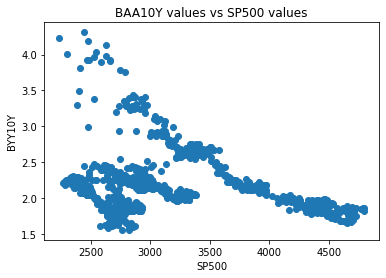

In [13]:
# compute correlation of values
value_corr = stocks_and_bonds['SP500'].corr(stocks_and_bonds['BAA10Y'])
print(f"Correlation of values: {value_corr}")

# scatter plot values first
plt.scatter(stocks_and_bonds['SP500'], stocks_and_bonds['BAA10Y'])
plt.title("BAA10Y values vs SP500 values")
plt.xlabel("SP500")
plt.ylabel("BYY10Y")
plt.show()

Seems to be a weak negative correlation of values.

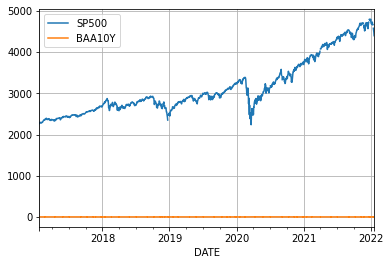

In [14]:
# also check plot over time
stocks_and_bonds['SP500'].plot(grid=True)
stocks_and_bonds['BAA10Y'].plot(grid=True)
plt.legend(['SP500','BAA10Y'])
plt.show()

To be able to create meaningfull line plots for both series we need to process them using a scaler. Will go for min-max scalare.

In [15]:
from sklearn import preprocessing
# use min max scalar
min_max_scalar = preprocessing.MinMaxScaler()

stocks_and_bonds['SP500_scaled'] = min_max_scalar.fit_transform(stocks_and_bonds[['SP500']]) 
stocks_and_bonds['BAA10Y_scaled'] = min_max_scalar.fit_transform(stocks_and_bonds[['BAA10Y']])
stocks_and_bonds.head()

,SP500,BAA10Y,SP500_scaled,BAA10Y_scaled
DATE,,,,
2017-01-20,2265.20,2.21,0.010863,0.236364
2017-01-23,2280.07,2.21,0.016673,0.236364
2017-01-24,2298.37,2.22,0.023824,0.240000
2017-01-25,2296.68,2.21,0.023164,0.236364
2017-01-26,2294.69,2.20,0.022386,0.232727


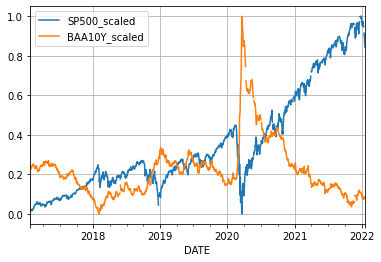

In [16]:
# plot scaled values of both series over time
stocks_and_bonds['SP500_scaled'].plot(grid=True)
stocks_and_bonds['BAA10Y_scaled'].plot(grid=True)
plt.legend(['SP500_scaled','BAA10Y_scaled'])
plt.show()

In [17]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,BAA10Y,SP500_scaled,BAA10Y_scaled
DATE,,,,
2017-01-20,NaN,NaN,NaN,NaN
2017-01-23,0.006565,0.000000,0.534892,0.000000
2017-01-24,0.008026,0.004525,0.428873,0.015385
2017-01-25,-0.000735,-0.004505,-0.027719,-0.015152
2017-01-26,-0.000866,-0.004525,-0.033570,-0.015385


Correlation of returns: 0.013730340983812348


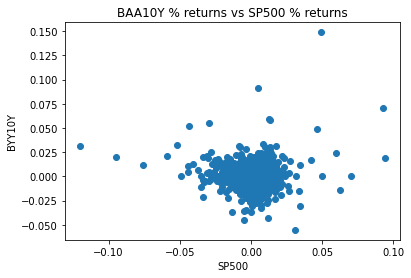

In [ ]:
# compute correlation of returns
returns_corr = returns['SP500'].corr(returns['BAA10Y'])
print(f"Correlation of returns: {returns_corr}")

# scatter plot % change
plt.scatter(returns['SP500'],returns['BAA10Y'])
plt.title("BAA10Y % returns vs SP500 % returns")
plt.xlabel("SP500")
plt.ylabel("BYY10Y")
plt.show()

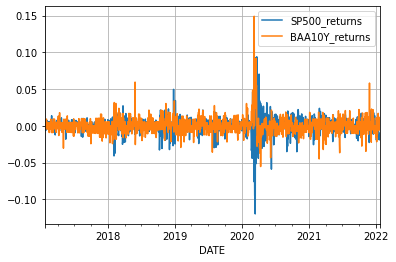

In [19]:
# plot the daily returns of both series over time
returns['SP500'].plot(grid=True)
returns['BAA10Y'].plot(grid=True)
plt.legend(['SP500_returns', 'BAA10Y_returns'])
plt.show()

There is no correlatation in returns compared to values above.  
  

**Simple Linear Regression of Times Series**  
* Simple linear regression:  
We can assume that the *true* relationship between variables Y and X can be formulated as:
$$_{Y_t=f(X_t) + \epsilon_t}$$  
We can try to approximate $$_{f(X)} $$
by a linear function can formulate it like this:  
$$_{y_t=\alpha+\beta x_t + \epsilon_t}$$
The `y` and `x` can be two time series.  
Also known as OLS (Ordinary Least Squares)  
  
**Python Packages to Perform Regression**  
* In statsmodels:
`import statsmodels.api as sm`  
`sm.OLS(y, x).fit()`  
  
* In numpy:
`np.polyfit(x, y, deg=1)` deg = 1 is first degree (fits data to a line)  
  
* In pandas:  
`pd.ols(y, x)`  
  
* In scipy:  
`from scipy import stats`  
`stats.linregress(x, y)`  
  
Note: The order of `x` and `y` is not consistent across packages!  

Example: Regression of Small Cap Returns on Large Cap  
* Import statsmodels module  
`import statsmodels.api as sm`  
  
* As previously, compute percentage change in both series  
`df['SPX_Rex'] = df['SPX_Prices'].pct_change()`  
`df['R2000_Ret'] = df['R2000_Prices'].pct_changes()`  
  
* Add constans to the DataFrame for regression intercept  
`df = sm.add_constant(df)`  
We add a column of 1s as a dependent right hand side variable, this is because if there is no constant column we would want a regression without and intercept. By adding a column of 1s stats model will compute the regression coefficient for that column as well. Which can be interprete as the intercept of the line.  
  
* The first row of returns is NaN.  
* Delete the ros of NaN  
`df = df.dropna()`  
  
* Run regression  
`results = sm.OLS(df['R2000_Ret'], df[['const','SPX_Ret']]).fit()`  
The method fit() runs the regression and the results are saved in a class instance called results.  
`print(results.summary())`  


In [20]:
# example
import statsmodels.api as sm

# add returns
stocks_and_bonds['SP500_Ret'] = stocks_and_bonds['SP500'].pct_change()
stocks_and_bonds['BAA10Y_Ret'] = stocks_and_bonds['BAA10Y'].pct_change()
df = stocks_and_bonds
df = sm.add_constant(df)
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
df.head()

,const,SP500,BAA10Y,SP500_scaled,BAA10Y_scaled,SP500_Ret,BAA10Y_Ret
DATE,,,,,,,
2017-01-23,1.0,2280.07,2.21,0.016673,0.236364,0.006565,0.000000
2017-01-24,1.0,2298.37,2.22,0.023824,0.240000,0.008026,0.004525
2017-01-25,1.0,2296.68,2.21,0.023164,0.236364,-0.000735,-0.004505
2017-01-26,1.0,2294.69,2.20,0.022386,0.232727,-0.000866,-0.004525
2017-01-27,1.0,2280.90,2.19,0.016998,0.229091,-0.006010,-0.004545


In [22]:
results = sm.OLS(df['SP500_Ret'],df[['const','BAA10Y_Ret']]).fit() # left is y, right is X´s
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SP500_Ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2392
Date:                Mon, 18 Apr 2022   Prob (F-statistic):              0.625
Time:                        11:21:05   Log-Likelihood:                 3594.3
No. Observations:                1203   AIC:                            -7185.
Df Residuals:                    1201   BIC:                            -7174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.838      0.0

The model´s R2 is zero and F-statistic high, indicating model is a bad fit and has no predictive capability.  
    
We can also manually calculate the coefficients to double check the coefficients from the `sm.OLS()` method.  
$$\hat\beta_{1}= {{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})} \over \sum_{i=1}^n(x_i - \bar{x})^2 } }   $$

$$\hat\beta_{0}= \bar{y}-\hat\beta_{1}\bar{x} $$


In [23]:
# Manual calculation of coeffs

# Calculate terms
y_mean = df["SP500_Ret"].mean()
x_mean = df["BAA10Y_Ret"].mean()
#print(f'y_mean: {y_mean}')
#print(f'x_mean: {x_mean}')
y_minus_y_mean = df["SP500_Ret"]-y_mean
x_minus_x_mean = df["BAA10Y_Ret"]-x_mean

beta1_numerator = np.sum(x_minus_x_mean*y_minus_y_mean)
#print(beta_numerator)
beta1_denominator = np.sum(x_minus_x_mean**2)
#print(beta_denominator)
beta1=(beta1_numerator/beta1_denominator)
print(f'BAA10Y_Ret coefficient: {beta1}')

beta0 = y_mean - (beta1*x_mean)
print(f'const coefficient: {beta0}')
# These match the OLS summary output

BAA10Y_Ret coefficient: 0.014468438689413284
const coefficient: 0.0006466844215594462


In the output the coeff `0.0145` is the slope of the regression. const is the intercept which is very close to zero.  
  
Can also pull out the following specific info  
* Intercept in `results.params[0]`
* Slope in `results.params[1]`  

In [24]:
print(results.params[0])
print(results.params[1])

0.0006466844215594464
0.01446843868941325


We can calculate the Standard Error for the coefficient estimation:
$$SE(\hat\beta_{1})^2={{\sigma^2 \over \sum_{i=1}^n(x_i - \bar{x})^2 } } $$

In [25]:
# sigma
#population_variance = (np.sum(x_minus_x_mean**2) / df.shape[0])
#print(f'Population variance: {population_variance}')

# variance of the errors
#   from above we have the numerator of the variance...
y_minus_y_mean = df["SP500_Ret"]-y_mean
#   ... divided by n-2 observations (instead of n)
variance_of_errors = (np.sum(y_minus_y_mean**2) / (df.shape[0]-2))
print(f'Variance of errors: {variance_of_errors}')

# From previous step, repeated!
beta1_denominator = np.sum(x_minus_x_mean**2)
print(f'Denominator: {beta1_denominator}')

standard_error_b1_squared = variance_of_errors / beta1_denominator  
print(f'SE beta1 squared: {standard_error_b1_squared}')

standard_error_b1 = standard_error_b1_squared**0.5
print(f'SE beta1: {standard_error_b1}')

Variance of errors: 0.000149000730501903
Denominator: 0.17024684805302787
SE beta1 squared: 0.0008752040475691672
SE beta1: 0.02958384774787024


Our manually calculated `SE` is rounded to `0.030` in the regression output. 


We can also manually calculate the confidence interal for our coefficient esimation:  
$$\hat\beta_{1} +-2*SE{(\hat\beta_{1})} $$
There is approximately 95% change that this interval will contain the true values of the coefficient. We can do this for one or both of the coefficients.

In [26]:
# Calculate CI for beta1 coefficient using Std err
# UCI
UCI = beta1 + (2*0.030)
# LCI
LCI = beta1 - (2*0.030)
print(f'The beta1 coefficient point estimate is: {beta1}')
print(f'The beta1 cofidence interval is: {UCI},{LCI}')

The beta1 coefficient point estimate is: 0.014468438689413284
The beta1 cofidence interval is: 0.07446843868941327,-0.045531561310586714


In this example, the SE is larger in magnitude than the point estimate itself, which creates a wide confidence interval with different signs of the upper and lower interals. Indicating uncertainty in the point estimate.

The relationship between R-squared and Correlation  
* [corr(x,y)]^2 = R^2 (or R-squared)
* sign(corr) = sign(regression slope)  

In [27]:
r = df['SP500_Ret'].corr(df['BAA10Y_Ret'])
print(r)    # r corr coefficient
print(r**2) # r2

0.014112225447628343
0.000199154907084689


We built a regression model with an example, however this model is not very usefull when we look at the diagnostics, r2 and F-statistic.

**Autocorrelation**  
* Correlation of a time series lagged copy of itself  
It is also called serial correlation. Often when we refer to a series autocorrelation we mean the lag-1 correlation.  
* Lag-one autocorrelation  
E.g a series that is lagged with one day  
* **Mean Reversion** - Negative autocorrelation
* **Momentum** or **Trend Following** - Positive autocorrelation  
  
Traders use autocorrelation to make money.  
* Individual stocks  
 * Historically have typically negative autocorrelation of about a week. A popular strategy is to buy stocks that have dropped over the past week and sell stocks that have gone up
 * Measured over short time horizons (days) 
  
Example of positive autocorrelation: Exchange rates  
* Use daily exchange rates in a `df` from FRED  
FRED = Federal Reserve Economic Data
* Convert index to datetime

In [ ]:
# DO NOT RUN

#convert index to datetime
df.index = pd.to_datetime(df.index)
# Downsample from daily to monthly data
df = df.resample(rule='M', how='last')
# Compute returns from prices
df['Return'] = df['Price'].pct_change()
# Compute autocorrelation
autocorrelation = df['Return'].autocorr()
print("The ac is: ",autocorrelation)

Look at some stocks and use the popular strategy of weekly mean reversion. Prices tend to bounce back, or revert, towards a previous level after large moves, which are observerd over time horizons of about a week.

In [28]:
# Create returns pandas series from the above df
returns = stocks_and_bonds[['SP500_Ret']]
returns = returns.dropna()

# Convert daily data to weekly
returns = returns.resample(rule='W').last()

# Compute and print the autocorrelation
autocorrelation = returns['SP500_Ret'].autocorr()
print(f"The autocorrelation of weekly returns is {autocorrelation}")

The autocorrelation of weekly returns is 0.1751497875364545


The autocorrelation of weekly returns is positive, so we have Moment or Trend Following pattern. Check this visually by plotting the series also.

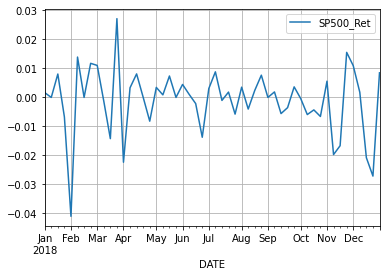

In [29]:
import matplotlib.pyplot as plt

# take one year sample
returns_2018 = returns.loc['2018']
returns_2018.plot(grid=True)
plt.show()

It seems from the plot above that there are some periods where there is a momentum in two weeks of the time series movement which confirms the interpretation of the calculated positive autocorrelation.  
  
Next:  

* Compute the autocorrelation of the column `'BAA10Y_Ret'` in daily_diff using the `.autocorr()` method.
* Use the `.resample()` method with arguments `rule='A'` to convert to annual frequency and `how='last'`.
 * The argument `how` in `.resample()` has been deprecated.
 * The new syntax `.resample().last()` also works.
* Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above

In [30]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = df["BAA10Y_Ret"].autocorr()
print("The autocorrelation of daily 10Y interest rate change is: ", autocorrelation_daily)

# Convert the daily data to annual data
yearly_rates = df[["BAA10Y"]].resample(rule="A").last() # takes last value for each year

# Repeat above for the annual data
yearly_diffs = yearly_rates.diff()
autocorrelation_yearly = yearly_diffs["BAA10Y"].autocorr()
print("The autocorrelation of yearly 10Y interest rate change is: ", autocorrelation_yearly)

The autocorrelation of daily 10Y interest rate change is:  0.20420572892340652
The autocorrelation of yearly 10Y interest rate change is:  -0.9412088718642954


(6, 1)


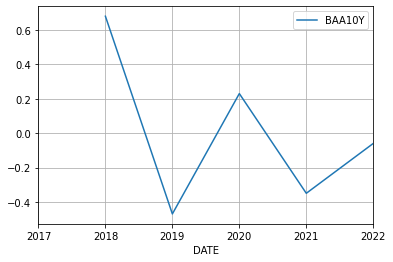

In [33]:
print(yearly_diffs.shape)
yearly_diffs.plot(grid=True)
plt.show()

The plot of the yearly series reveals the reverting to mean pattern for these years which is what we expect when we see the negative yearly autocorrelation calculated above.

## 2. Some Simple Time Series

#### Autocorrelation function  
* **Autocorrecation Function (ACF)**: The autocorrelation as a function of the lag. Shows not just the lag 1 autocorrelation but the entire autocorrelation for different lags. Any non-zero autocorrelation of a series implies that the series can be forecasted from the past.  
 * E.g if the lag 1 and lag 2 autocorrelation values differ from zero we can use the last two values in series for forecasting.
 * E.g ACF can also be useful for Model Selection.  
  
**Plot ACF in Python**  
* Import module:  
`from statsmodels.graphics.tsaplots import plot_acf`  
* Plot the ACF:  
`plot_act(x, lags=20, alpha=0.05)`   
The input `x` is a series or an array.  
The `lags` argument set lags of the autocorrelation function to be plotted.  
The `alpha` argument sets width of a confidence interval, blue region.  

**Confidence Interval of ACF**  
* With value `0.05` there is only `5%` chance that if true autocorrelation is zero, it will fall oustide the blue band.  
* We will get a wider confidence interval if  
 * we set the alpha lower 
 * if we have fewer observations.
* Under some simple assumptions, 95% confidence bands are `+-2 / sqrt of N`
* If we don´t want to have confidence intervals in the plot, set `alpha=1`  


(52, 1)


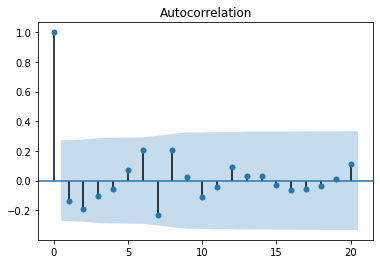

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

print(returns_2018.shape)
plot_acf(returns_2018, lags=20, alpha=0.05)
plt.show()

**ACF Values Instead of Plot**  
`from statsmodels.tsa.stattools import acf`  
`print(acf(x))` 
We can use this if we just want to have the acf values instead of plotting them.

In [36]:
from statsmodels.tsa.stattools import acf
print(acf(returns_2018))

[ 1.         -0.1353933  -0.1928933  -0.10374157 -0.05962163  0.06980047
  0.20687503 -0.22973272  0.20934708  0.02141939 -0.10756919 -0.04133134
  0.09392006  0.02922433  0.03414041 -0.02871223 -0.06216116 -0.05660125
 -0.03630969  0.01318185  0.11360175  0.0761697  -0.10331401 -0.10322296
 -0.04643831  0.07485841  0.03072843  0.01918188  0.00968414 -0.06605812
 -0.0379433  -0.12343888  0.1167082   0.01377857 -0.08537346  0.00284623
 -0.03366846 -0.00440221  0.04304739 -0.13129225  0.18255928]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


* Compute the array of autocorrelations of the quarterly `SP500` data.
* Plot the autocorrelation function of the quarterly data and pass the argument `alpha=1` to suppress the confidence interval.

In [38]:
# OMA create quarterly data by converting daily data
quarterly_data = df[['SP500']].resample(rule='Q').last()
print(quarterly_data.shape)
quarterly_data.head()

(21, 1)


,SP500
DATE,
2017-03-31,2358.84
2017-06-30,2429.01
2017-09-30,2529.12
2017-12-31,2673.61
2018-03-31,2640.87


[ 1.          0.81173708  0.63976021  0.46748374  0.29433336  0.16881855
  0.03459847 -0.0436937  -0.08943137 -0.0886942  -0.14941354 -0.18596626
 -0.22227825 -0.2917113  -0.30368118 -0.34453476 -0.33751208 -0.31027096
 -0.26322011 -0.19759531 -0.08872838]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


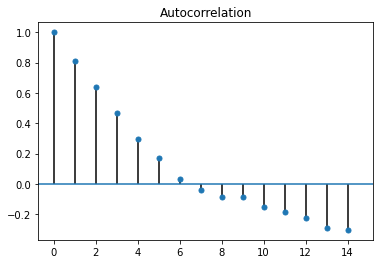

In [39]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of SP500 quarterly
acf_array=acf(quarterly_data['SP500'])
print(acf_array)

# Plot the acf function
plot_acf(quarterly_data, alpha=1)
plt.show()

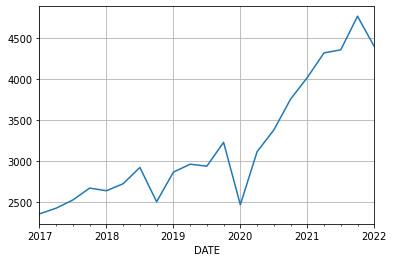

In [40]:
# Check if the first 6 lags of positive auto correlation makes sense by plotting the quarterly data in a line chart
quarterly_data['SP500'].plot(grid=True)
plt.show()

The above chart makes some sense when comparing to the autocorrelation array for the quarterly data.  
  
**Are We Confident That SP500 Returns are Mean Reverting?**  
Another question is to check what is the situation with the weekly data instead of quarterly.  
  
Recompute the autocorrelation of weekly returns in the Series `'SP500-Ret'` in the `df`.
* Find the number of observations in the returns DataFrame using the `len()` function.
* Approximate the 95% confidence interval of the estimated autocorrelation. By using math function `math.sqrt()`.
* Plot the autocorrelation function of `df` using `plot_acf` that was imported from statsmodels. Set `alpha=0.05` for the confidence intervals (that's the default) and `lags=20`.

In [41]:
# OMA create weekly data by convering daily data
weekly_data = df[['SP500_Ret']].resample(rule='W').last()
print(weekly_data.shape)
weekly_data.head()

(261, 1)


,SP500_Ret
DATE,
2017-01-29,-0.006010
2017-02-05,-0.002115
2017-02-12,0.005246
2017-02-19,0.001679
2017-02-26,0.001018


The aurocorrelation of the weekly SP500 Ret is 0.21665429419146473
The number of observations is:  261
The approx confidence interval is +/- : 0.1213209542756739


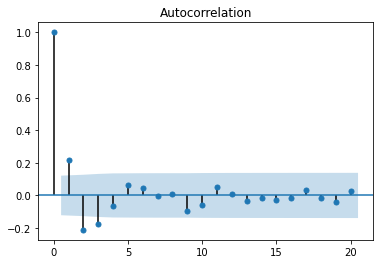

In [42]:
from math import sqrt

# Compute and print the autocorrelation of the weekly data
autocorrelation = weekly_data['SP500_Ret'].autocorr()
print("The aurocorrelation of the weekly SP500 Ret is", autocorrelation)

# Find the number of observations in the df
nobs = len(weekly_data)
print("The number of observations is: ", nobs)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approx confidence interval is +/- :", conf)

# Plot the autocorrelation function with 95% conf interval and 20 lags
plot_acf(weekly_data, alpha=0.05, lags=20)
plt.show()

(52, 1)


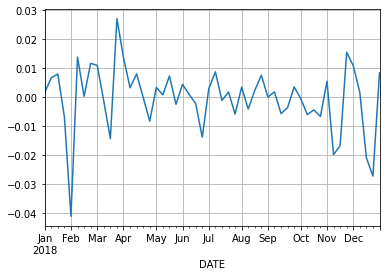

In [43]:
# Check if the the first lag of positive autocorr makes sense by plotting the weekly data

# Slice the data to only include one year to be able to see the weekly changes
weekly_data_2018 = weekly_data.loc['2018']

print(weekly_data_2018.shape)
weekly_data_2018['SP500_Ret'].plot(grid=True)
plt.show()

The pattern seen in the graph of some 2 weeks trend in the data supports the positivie and significant autocorrelation for lag 1 in the array print out. So the answer to our question is that **the weekly data is not mean reverting** in our example. Instead it has some momentum or **trend of 2 weeks**!  
  
**White Noise**  
  
What is White Noice? (There are several ways to define it)  
* White Noise is a series with:
 * Constant mean
 * Constant variance
 * Zero autocorrelations at all lags
* Special Case: If data has normal distribution, then it is *Gaussian White Noise*.  
  
**Simulating White Noise**  
This is easy to generate. One way of generating it is using `numpy` in the following way:  
`np.random.normal(loc=0, scale=1, size=500)`  
Where `loc` is the mean, `scale` is the standard deviation and `size` is the sample size.  


In [52]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)
noise[0:10]

array([-0.67433683,  0.33747844, -0.79083943, -0.88972673,  0.03381213,
       -0.097802  ,  0.36801557,  1.06210879,  1.33193057, -1.01881416])

What does white noise look like?

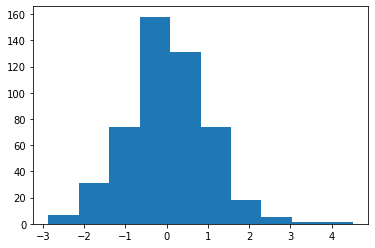

In [55]:
plt.hist(noise)
plt.show()

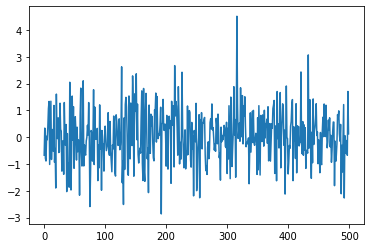

In [56]:
plt.plot(noise)

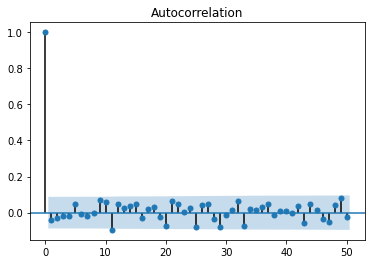

In [57]:
# auto correlcation of white noise is all zero
plot_acf(noise, lags=50, alpha=0.05)
plt.show()

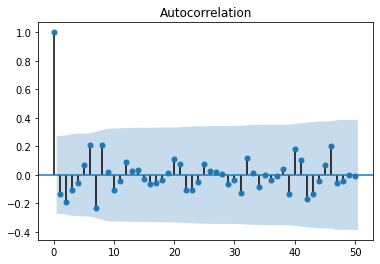

In [58]:
# Compare with SP500 autocorrelation function, close to white noise
plot_acf(returns_2018, lags=50, alpha=0.05)
plt.show()

There is no lag where the auto correlation of returns is significantly larger than zero. Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.  
  
**Random Walk**  
What is a random walk?  
* Today´s price = yesterday´s price + noise    
   
$$P_{t} = {P_{t-1}+\epsilon_{t}} $$  
  
* Change in price is just white noise    
   
$$P_{t} - {P_{t-1}=\epsilon_{t}} $$
  
* We can´t forecast a random walk  
* The best guess (forecast) of tomorrow´s price is simply today´s price  
  
* Random walk with a drift, drift with `mju` in every period 
  
$$P_{t} =  {\mu+P_{t-1}+\epsilon_{t}} $$
  
* Change in price is just white noise with non-zero mean: 
  
$$P_{t} - {P_{t-1}=\mu+\epsilon_{t}} $$  
  
**Statistical Test for Random Walk**  
By regressing current prices on lagged prices.  
  
* Random walk with a drift 
  
$$P_{t} =  {\mu+P_{t-1}+\epsilon_{t}} $$  
  
* Regression test for random walk  

$$P_{t} =  {\alpha+\beta P_{t-1}+\epsilon_{t}} $$  

Test: If the slope coefficient `beta` is not significantly different from 1, then we cannot reject the null hypothesis that the series is a random walk.  
  
However, if the slope coefficient is significantly less than 1 then we can reject the null hypothesis that the series is a random walk.  
  
The way to do that is to regress the difference in prices in on the lagged price:  
  
$$P_{t}-P_{t-1} =  {\alpha+\beta P_{t-1}+\epsilon_{t}} $$  
  
And instead of testing if the slope coefficient `beta` is `1` now we test if it is `0`.  
  
This is called the Dickey-Fuller test:

$$H_{0}: {\beta=0 (random walk)} $$  
  
$$H_{1}: {\beta<0 (not random walk)} $$  
  
If we add more lagged prices on the right hand side it is called the Augmented Dickey-Fuller test.  
  
**ADF Test in Python**  
* Use module from statsmodels  
`from statsmodels.tsa.stattools import adfuller`  
* Run Augmented Dickey Fuller test  
`adfuller(x)`  


In [59]:
# Example
from statsmodels.tsa.stattools import adfuller

# Run ADF on SP500
test_results = adfuller(df['SP500'].values)

# Print p-value
print(f'print p-value: {test_results[1]}')  

print p-value: 0.9540229850032211


The main value we are interested in is the `p-value` of the test. If the `p-value` is less than `0.05` then we can reject the hypothesis that the series is a random-walk with `95%` confidence.  
In this case the `p-value` is much higher than that and we **cannot reject the null hypothesis that the series is a random walk**.

In [60]:
# print full results  
test_results

(-0.05190767234563959,
 0.9540229850032211,
 22,
 1180,
 {'1%': -3.435903883450231,
  '10%': -2.5680757461936223,
  '5%': -2.863992471942117},
 11744.671819763591)

We can also print out the full results of the test, like `1180` the number of observations and `-0.05190767234563959` test statistica of the test and the critical values for various alphas of `1%`,`10%`,`5%`.
  
  
**Generate a Random Walk**  
  
An example. Whereas stock *returns* are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

We will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If we run this code multiple time, we will see several realizations.

[ 0.          0.54063413 -0.28387853  2.38192945 -0.20303364]
[100.         100.54063413 100.2567556  102.63868505 102.43565141]


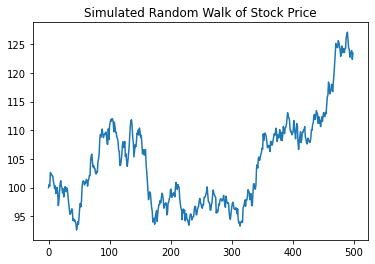

In [82]:
# generate 500 random steps with mean 0 and sd 1
steps = np.random.normal(loc=0, scale=1, size=500)

# set first element to 0 so first price will be the starting stock price
steps[0]=0
print(steps[0:5])

# simulate stock prices, P with starting price of 100
P = 100 + np.cumsum(steps)
print(P[0:5])

# plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk of Stock Price")
plt.show()

The simulated price series we plotted should closely resemble a random walk.  
  
**Get the Drift**  
  
In the previous step, we simulated stock prices that follow a random walk. Now we will extend this in two ways.

* We will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
* In the previous step, the noise in the random walk was *additive*: random, normal changes in price were added to the last price. However, when adding noise, we could theoretically get negative prices. Now we will make the noise *multiplicative*: we will add one to the random, normal changes to get a total return, and multiply that by the last price.

[1.         1.00903849 1.00507137 1.0046652  0.99539045]
[100.         100.90384941 101.41557009 101.88869395 101.41903331]


Text(0.5, 1.0, 'Simulated Random Walkd of Stock Price with Drift')

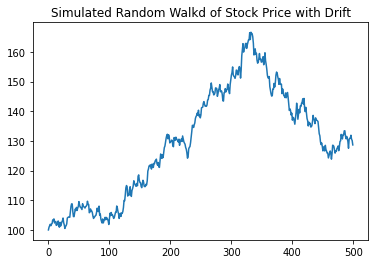

In [83]:
# generate 500 random steps with mean 1.001 and sd 0.01
steps = np.random.normal(loc=0.001, scale=0.01, size=500)+1

# set first element to 1
steps[0]=1
print(steps[0:5])

# simulate the stock price, P , by taking the cumulative product
P = 100 * np.cumprod(steps)
print(P[0:5]) 

# plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walkd of Stock Price with Drift")

This simulated price series we plotted should closely resemble a random walk for a high flying stock.  
  
**Is the SP500 and BAA10Y Random Walks?**  
  
Most stock prices follow a random walk (perhaps with a drift). We will look at a time series of SP500 stock priceindex and BAA10Y rate and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [98]:
# import adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# run adf on the SP500 and BAA10Y series and check the results
results = adfuller(df['SP500'])
results1 = adfuller(df['BAA10Y'])
print(f'print SP500 full results:\n {results}\n')
print(f'print BAA10Y full results:\n {results1}\n')

# print just the p-value
print(f'the p-value of the test of SP500 stock price index is: {results[1]}')
print(f'the p-value of the test of BAA10Y rate index is: {results1[1]}')  
  
df.head()

print SP500 full results:
 (-0.05190767234563959, 0.9540229850032211, 22, 1180, {'1%': -3.435903883450231, '5%': -2.863992471942117, '10%': -2.5680757461936223}, 11744.671819763591)

print BAA10Y full results:
 (-2.392935146888236, 0.14374034797439406, 15, 1187, {'1%': -3.4358710597388042, '5%': -2.863977991064458, '10%': -2.5680680340944337}, -5028.593026468976)

the p-value of the test of SP500 stock price index is: 0.9540229850032211
the p-value of the test of BAA10Y rate index is: 0.14374034797439406


,const,SP500,BAA10Y,SP500_scaled,BAA10Y_scaled,SP500_Ret,BAA10Y_Ret
DATE,,,,,,,
2017-01-23,1.0,2280.07,2.21,0.016673,0.236364,0.006565,0.000000
2017-01-24,1.0,2298.37,2.22,0.023824,0.240000,0.008026,0.004525
2017-01-25,1.0,2296.68,2.21,0.023164,0.236364,-0.000735,-0.004505
2017-01-26,1.0,2294.69,2.20,0.022386,0.232727,-0.000866,-0.004525
2017-01-27,1.0,2280.90,2.19,0.016998,0.229091,-0.006010,-0.004545


According to our test, we cannot reject the null hypothesis that SP500 and BAA10Y follow a random walk. Next, we will look at the returns.

In [99]:
# import adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# run adf on the SP500 and BAA10Y series and check the results
results = adfuller(df['SP500_Ret'])
results1 = adfuller(df['BAA10Y_Ret'])
print(f'print SP500_Ret full results:\n {results}\n')
print(f'print BAA10Y_Ret full results:\n {results1}\n')

# print just the p-value
print(f'the p-value of the test of SP500_Ret stock price index is: {results[1]}')
print(f'the p-value of the test of BAA10Y_Ret rate index is: {results1[1]}')  
  
df.head()

print SP500_Ret full results:
 (-8.570505058511346, 8.22232913471858e-14, 21, 1181, {'1%': -3.4358991704737245, '5%': -2.863990392722102, '10%': -2.568074638859274}, -7217.194713794877)

print BAA10Y_Ret full results:
 (-7.737778795258839, 1.082062400333422e-11, 10, 1192, {'1%': -3.4358478507713777, '5%': -2.863967751840151, '10%': -2.568062580992973}, -7176.04266694426)

the p-value of the test of SP500_Ret stock price index is: 8.22232913471858e-14
the p-value of the test of BAA10Y_Ret rate index is: 1.082062400333422e-11


,const,SP500,BAA10Y,SP500_scaled,BAA10Y_scaled,SP500_Ret,BAA10Y_Ret
DATE,,,,,,,
2017-01-23,1.0,2280.07,2.21,0.016673,0.236364,0.006565,0.000000
2017-01-24,1.0,2298.37,2.22,0.023824,0.240000,0.008026,0.004525
2017-01-25,1.0,2296.68,2.21,0.023164,0.236364,-0.000735,-0.004505
2017-01-26,1.0,2294.69,2.20,0.022386,0.232727,-0.000866,-0.004525
2017-01-27,1.0,2280.90,2.19,0.016998,0.229091,-0.006010,-0.004545


The p-values are extremely small for both series, so **we can easily reject the hypothesis that returns are a random walk** at all levels of significance.  
  
**Stationarity**  
TBD

In [ ]:
# Jatka tästä
# https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=11